In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [24]:
y=df['charges']

In [27]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
c=lr.intercept_
c

-11827.7331417957

In [34]:
m=lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [36]:
y_predict_train=lr.predict(x_train)
y_predict_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

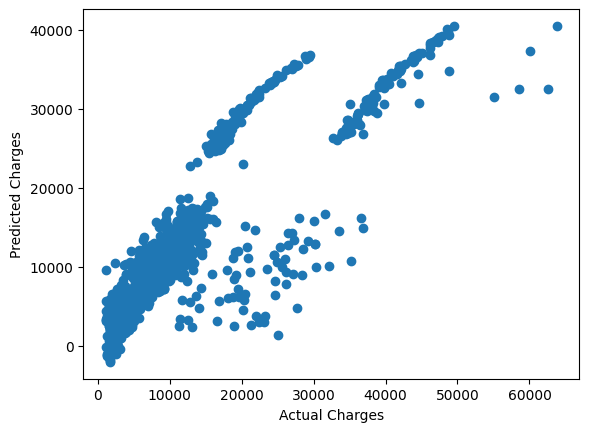

In [42]:
plt.scatter(y_train,y_predict_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()



In [44]:
from sklearn.metrics import r2_score
r2_score(y_train,y_predict_train)

0.7306840408360217